In [77]:
import cPickle as pickle
import h5py
import sys
sys.path.append('/data/GCE_sys/')
import Analysis




def PlotRadial(start, stop, energy, text):
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%1==0:
            h = h5py.File('../mod_c/'+model)
            fit = h['/fit_results/scan_radius'].attrs
            avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
            
            E = fit['energies']
            
            # Find closest energy
            E_bin = np.argmin(np.abs(energy-E))
            
            if area_ratios is None:
                area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.))[0].shape[0]) for r1, r2 in fit['radius']]
            
            radial_prof = [area_ratios[i_r]*E[E_bin]**2/1e3*fit['flux_ring_%i'%i_r][E_bin] for i_r in range(len(avR))]
            radial_prof_unc = np.array([area_ratios[i_r]*E[E_bin]**2/1e3*fit['fluxunc_ring_%i'%i_r][E_bin] for i_r in range(len(avR))]).T
            
            
            if i==3:
                plt.errorbar(avR, radial_prof, radial_prof_unc, color='firebrick', alpha=(i+3)/14., marker='d')
            else:
                plt.errorbar(avR, radial_prof, color='firebrick', alpha=(i+3)/14.)
            

    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
    
    
    plt.text(.85, .9,text, transform=plt.gca().transAxes, fontsize=8, color='k')    
    
    plt.text(.04, .15, r'E=%1.2f GeV'%(E[E_bin]/1e3),transform=plt.gca().transAxes, fontsize=8, color='k')
    plt.text(.04, .04, r'Light to Dark: $f_{\rm sprl} \in [0,0.5,\Delta=.05]$',transform=plt.gca().transAxes, fontsize=8, color='firebrick')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{\psi\ [Deg]}$')
    

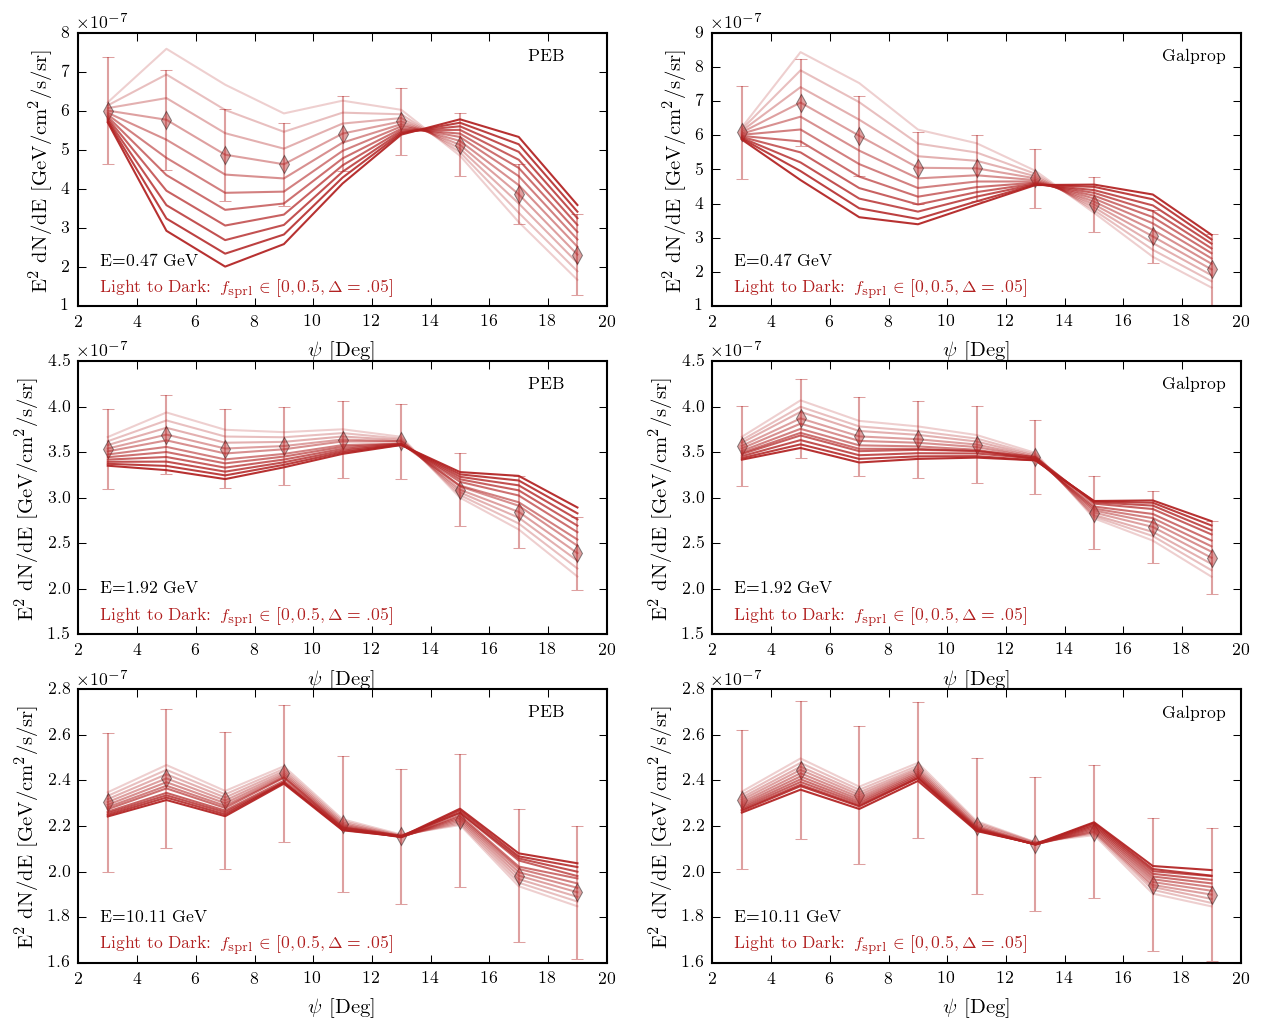

In [78]:
plt.figure(figsize=(10,8))
plt.subplot(321)
PlotRadial(0, 11,.5e3, text='PEB')
plt.subplot(323)
PlotRadial(0, 11,2e3, text='PEB')
plt.subplot(325)
PlotRadial(0, 11,5e3, text='PEB')


plt.subplot(322)
PlotRadial(43, 54, .5e3, text='Galprop')
plt.subplot(324)
PlotRadial(43, 54, 2e3, text='Galprop')
plt.subplot(326)
PlotRadial(43, 54, 5e3, text='Galprop')


In [132]:
import cPickle as pickle
import h5py
import sys
sys.path.append('/data/GCE_sys/')
import Analysis




def PlotRadialSpectra(start, stop, text):
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%1==0:
            h = h5py.File('../mod_c/'+model)
            fit = h['/fit_results/scan_radius'].attrs
            avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
            
            E = fit['energies']
            
            # Find closest energy
            #E_bin = np.argmin(np.abs(energy-E))
            
            if area_ratios is None:
                area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.))[0].shape[0]) for r1, r2 in fit['radius']]
            
            radial_prof = [area_ratios[i_r]*E**2/1e3*fit['flux_ring_%i'%i_r] for i_r in range(len(avR))]
            radial_prof_unc = np.array([area_ratios[i_r]*E**2/1e3*fit['fluxunc_ring_%i'%i_r][:,1] for i_r in range(len(avR))])
            
            for i_r,r in enumerate(avR):
                plt.subplot(6,2,i_r+1)
                if i==3:
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.ylim(1e-7, 1e-6)
                    plt.xlim(3e-1,1e2)
                    plt.text(.75, .85, r'$\psi=%1.1f$ deg'%r, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.text(.4, .85,text, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.errorbar(E/1e3, radial_prof[i_r], radial_prof_unc[i_r,], color='firebrick', alpha=(i+3)/14., marker='')
                else:
                    plt.loglog(E/1e3, radial_prof[i_r], color='firebrick', alpha=(i+3)/14.)
            

    
    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
    
    
    
    plt.text(.04, .15, r'Light to Dark: $f_{\rm sprl} \in [0,0.5,\Delta=.05]$',transform=plt.gca().transAxes, fontsize=8, color='firebrick')
    #plt.text(.04, .15, r'E=%1.2f GeV'%(E[E_bin]/1e3),transform=plt.gca().transAxes, fontsize=8, color='k')
    
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{\psi\ [Deg]}$')
    

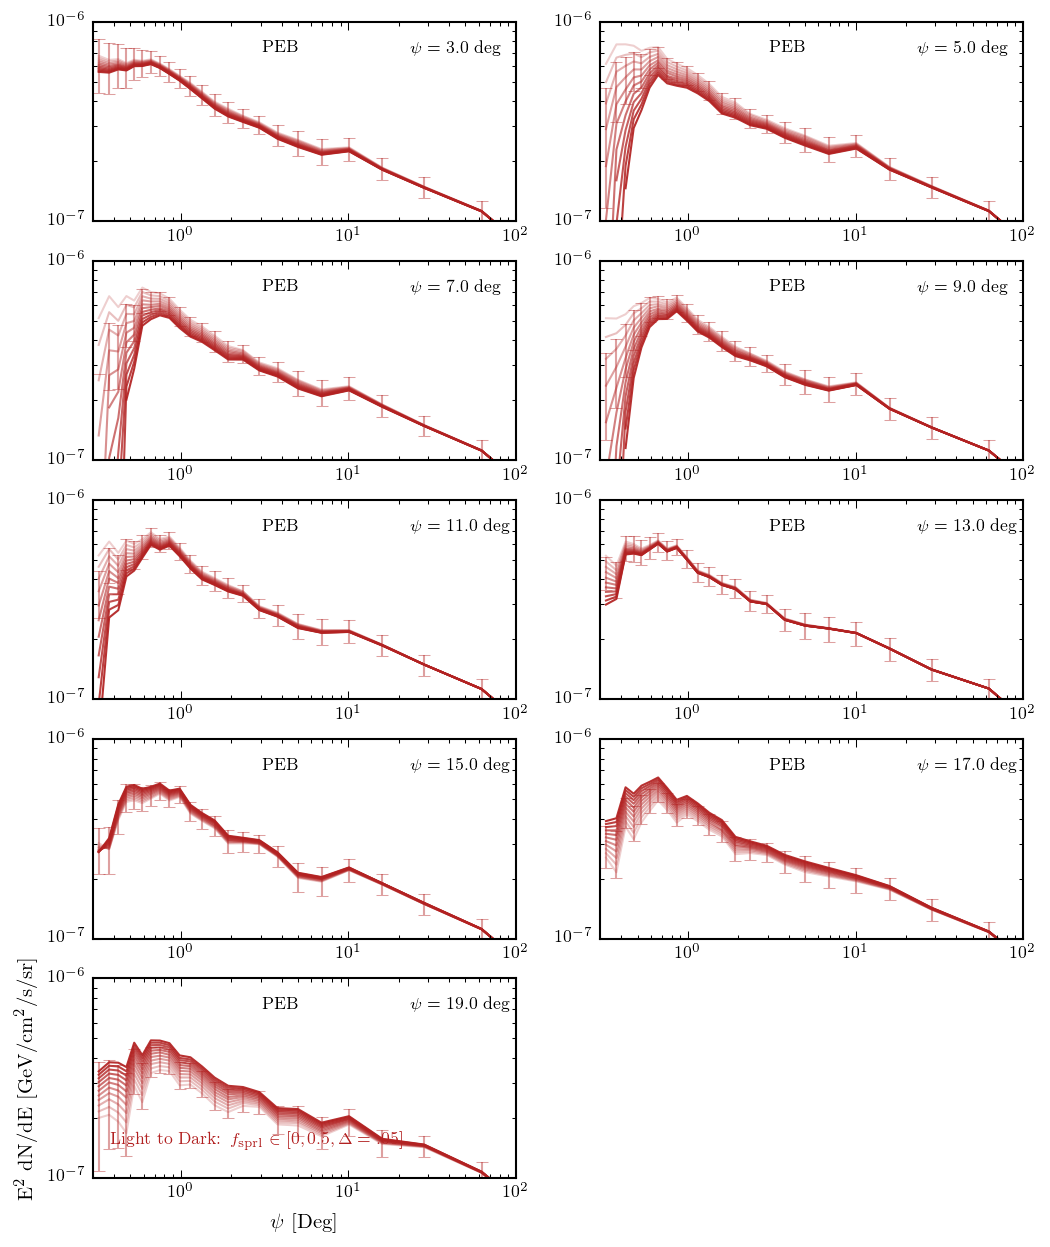

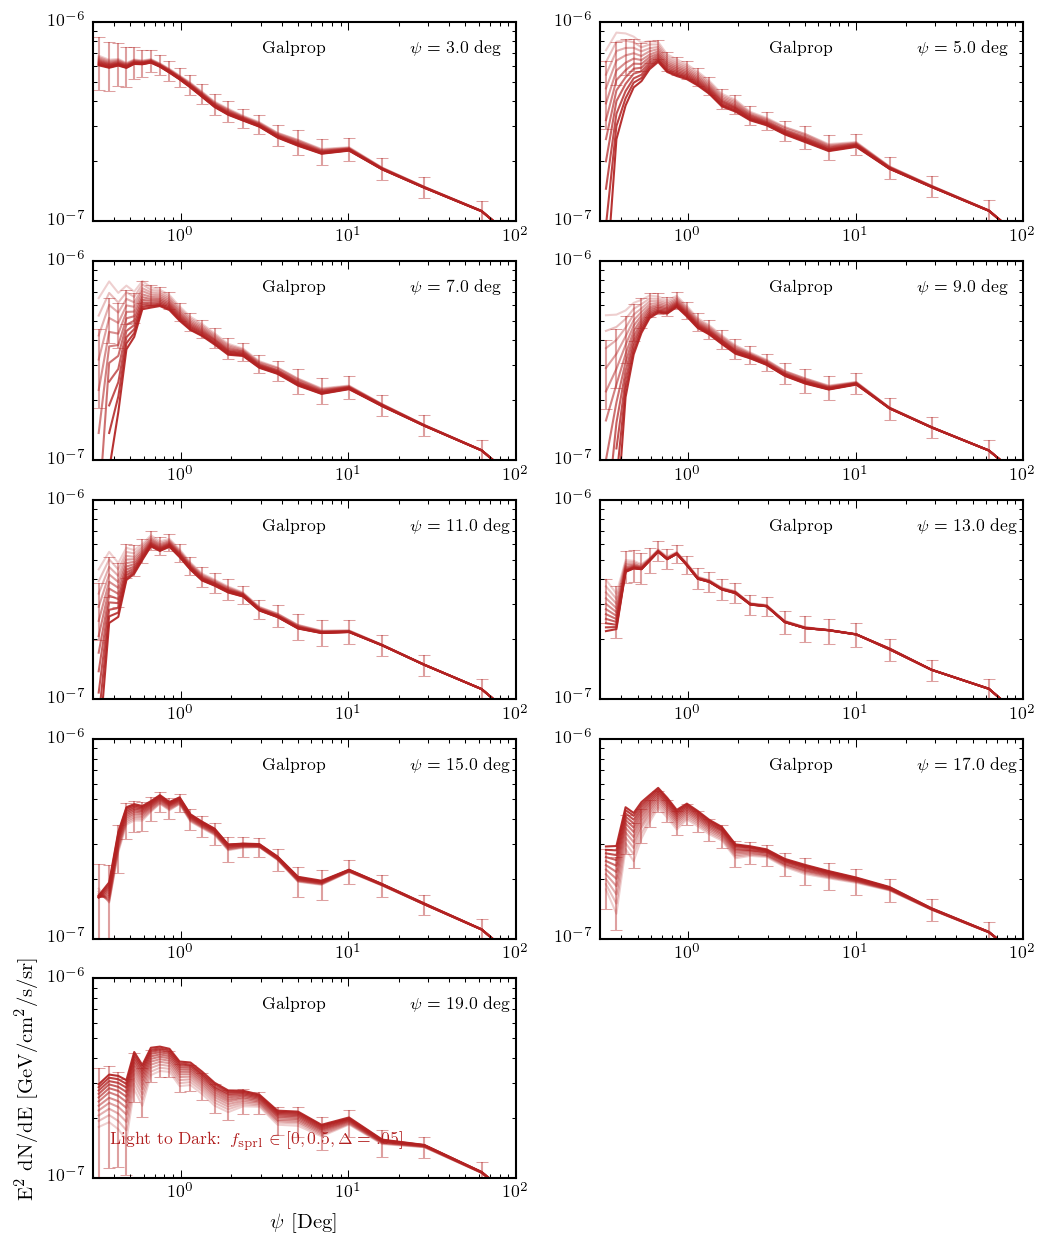

In [133]:
plt.figure(figsize=(8,12))
PlotRadialSpectra(0, 11, text='PEB')
plt.show()
plt.figure(figsize=(8,12))
PlotRadialSpectra(43, 54, text='Galprop')